In [4]:
import random
import networkx as nx
import math
import time
import matplotlib.pyplot as plt
from itertools import combinations, groupby


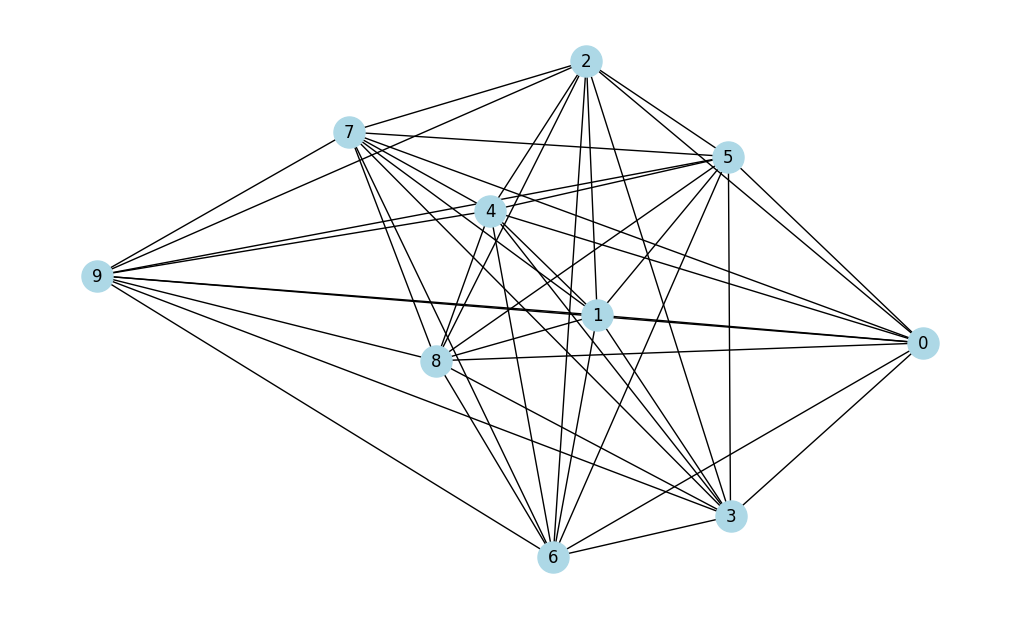

In [10]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)  
    if draw:
        plt.figure(figsize=(10,6))
        if directed:
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue',
                    with_labels=True,
                    node_size=500,
                    arrowsize=20,
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
        else:
            nx.draw(G, node_color='lightblue',
                with_labels=True,
                node_size=500)
    return G
graph_data = gnp_random_connected_graph(10, 1, False, True).edges(data = True)
#print(gnp_random_connected_graph(10, 1, False, True).edges(data = True))

In [11]:
def graph_preparation(graph: list, directed: bool ) -> list:
    """
    Function change and sort record of graph from previous function
    """
    N = 10 #nodes number
    G = gnp_random_connected_graph(N, 0.3, False, False)
    matrix = [[math.inf for _ in range(N)] for _ in range(N)]
    for u, v, d in G.edges(data=True):
        if directed is False:
            matrix[u][v] = d['weight']
            matrix[v][u] = d['weight']
        else:
            matrix[u][v] = d['weight']
    return matrix

In [12]:
def algorithm_floyd(grath: list, directed: bool) -> list:
    """
    function...
    """
    graph_data = gnp_random_connected_graph(10, 1, False, False).edges(data = True)
    N = len(grath)
    P = [[elem for elem in range(N)] for u in range(N)]
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = grath[i][k] + grath[k][j]
                if grath[i][j] > d:
                    grath[i][j] = d
                    P[i][j] = k
    return grath
print(algorithm_floyd(graph_preparation(graph_data, False), False))

[[-114, -114, -104, -113, -103, -119, -114, -117, -131, -205], [-114, -114, -104, -113, -103, -119, -114, -117, -131, -205], [-104, -104, -94, -103, -93, -109, -104, -107, -121, -195], [-113, -113, -103, -112, -102, -118, -113, -116, -130, -204], [-103, -103, -93, -102, -92, -108, -103, -106, -120, -194], [-119, -119, -109, -118, -108, -124, -119, -122, -136, -210], [-114, -114, -104, -113, -103, -119, -114, -117, -131, -205], [-117, -117, -107, -116, -106, -122, -117, -120, -134, -208], [-131, -131, -121, -130, -120, -136, -131, -134, -148, -222], [-205, -205, -195, -204, -194, -210, -205, -208, -222, -296]]


In [17]:
def time_compare():
    """
    function
    """
    num_vert = [10, 20, 50, 100, 200]
    for num in num_vert:
        graph_data = gnp_random_connected_graph(num, 1, False, False).edges(data = True)
        start_time = time.time()
        algorithm_floyd(graph_preparation(graph_data, False), False)
        print(f"{num}vertex -- %s sec " % (time.time() - start_time))
    return "my algo_result |"
print(time_compare())   

10vertex -- 0.0006971359252929688 sec 
20vertex -- 0.0004730224609375 sec 
50vertex -- 0.0005290508270263672 sec 
100vertex -- 0.0005028247833251953 sec 
200vertex -- 0.0004889965057373047 sec 
my algo_result |
